In [0]:
import pandas as pd
import os
import tarfile

In [0]:
#Download the data
!wget https://raw.githubusercontent.com/swnesbitt/ATMS-597-SP-2020/master/ATMS-597-SP-2020-Project-4/KCMI_hourly.csv

In [0]:
#Used to unzip the .tar.gz files
!gunzip drive/My\ Drive/Colab\ Notebooks/ATMS-597/Module04/Project04/sfc.tar.gz

In [0]:
#Use this to untar the .tar files
#Looks like it will send all of these to a new remote directory called 'bufkit'
#Might want to specify a destination folder in the future
!tar -xvf drive/My\ Drive/Colab\ Notebooks/ATMS-597/Module04/Project04/sfc.tar

In [0]:
dailyobs = pd.read_csv('drive/My Drive/KCMI_dailyNOFOOTER.csv', header=8)

In [25]:
dailyobs.drop(['Total Precip (in)'],axis=1)

,Date,Max Hourly Temp (F),Min Hourly Temp (F),Max Wind Speed (mph)
0,1/1/2010,12,2,15
1,1/2/2010,6,-5,15
2,1/3/2010,10,-6,11
3,1/4/2010,11,-2,20
4,1/5/2010,10,-1,16
...,...,...,...,...
3647,12/27/2019,43,32,15
3648,12/28/2019,56,32,23
3649,12/29/2019,59,41,23
3650,12/30/2019,38,31,26


In [0]:
hourlyobs = pd.read_csv('drive/My Drive/KCMI_hourly.csv')

In [27]:
hourlyobs

,Timestamp,year,month,day,hour,tmpc,dwpc,mslp,wdir,wspd,skct,pr1h,pr6h,doy,woy
0,2005-12-31 19:00:00,2006,1,1,1,0.6,-1.7,1012.6,220.0,2.1,2.0,0.0,NaN,365,52
1,2005-12-31 20:00:00,2006,1,1,2,0.0,-1.7,1012.9,160.0,2.1,0.0,0.0,NaN,365,52
2,2005-12-31 21:00:00,2006,1,1,3,-0.6,-2.2,1013.4,170.0,1.5,0.0,0.0,NaN,365,52
3,2005-12-31 22:00:00,2006,1,1,4,-1.1,-2.2,1012.9,160.0,3.1,0.0,0.0,NaN,365,52
4,2005-12-31 23:00:00,2006,1,1,5,-1.1,-2.2,1013.1,160.0,3.1,0.0,0.0,NaN,365,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124274,2020-03-08 20:00:00,2020,3,9,2,12.2,-1.1,1022.0,180.0,8.2,NaN,NaN,NaN,68,10
124275,2020-03-08 21:00:00,2020,3,9,3,12.2,-1.1,1021.9,180.0,9.8,NaN,NaN,NaN,68,10
124276,2020-03-08 22:00:00,2020,3,9,4,10.6,-0.6,1021.9,180.0,8.8,NaN,NaN,NaN,68,10
124277,2020-03-08 23:00:00,2020,3,9,5,9.4,0.0,1022.0,190.0,6.2,NaN,NaN,NaN,68,10


In [0]:
hourlyprecip = hourlyobs.drop(['year','month','day','hour','tmpc','dwpc','mslp','wdir','wspd','skct','pr6h','doy','woy'],axis=1)

In [64]:
hourlyprecip.set_index('Timestamp')

,pr1h
Timestamp,
2005-12-31 19:00:00,0.0
2005-12-31 20:00:00,0.0
2005-12-31 21:00:00,0.0
2005-12-31 22:00:00,0.0
2005-12-31 23:00:00,0.0
...,...
2020-03-08 20:00:00,NaN
2020-03-08 21:00:00,NaN
2020-03-08 22:00:00,NaN


In [0]:
hourlyprecip.index = pd.to_datetime(hourlyprecip['Timestamp'])

In [0]:
dailyprecip = dailyprecip.resample('d').sum()

In [0]:
dailyprecip.columns = ['Daily Precip']

In [69]:
dailyprecip

,Daily Precip
Timestamp,
2005-12-31,0.0
2006-01-01,0.0
2006-01-02,2.3
2006-01-03,0.2
2006-01-04,0.0
...,...
2020-03-05,0.0
2020-03-06,-0.2
2020-03-07,0.0


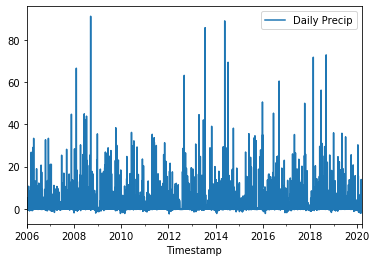

In [70]:
dailyprecip.plot()